# Ice Distribution Xanadu
## Explain the Numbers
### Your task, should you choose to accept it, is to explain the paper below.

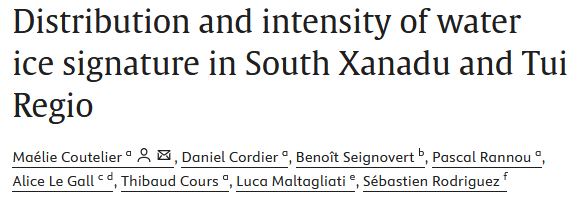

Link: https://www.sciencedirect.com/science/article/pii/S0019103521001469?via%3Dihub

So our goal in this notebook is to examine this paper up and down to find all of its seeeeeecrets. It's a decenlty sized one, so this will be quite an undertaking to be sure. The paper itself is, overall, an examination of water ice signatures in Xanadu and Tui Regio, which as a bonus helps us find the fractal dimension of Titan aerosols, find specifics on some VIMS instrument erros, and get information on grain size. There's a lot and we need to understand all of it.



# INTRODUCTION
## Where they tell us what we already know, mostly. 
### Watch me get proven wrong.


First note: water has been detected in IR-blue "dark blue" units before by several individuals. 

This particular paper focuses on two radar bright channels in South Xanadu anld North Tui Regio. 

# RADAR AND INFRARED OBSERVATIONS
## Heck yeah, use both!
### Dog AND cat food.

Use both RADAR (radar) and VIMS (infrared). 

VIMS cubes used were 1590648776_1 (C15) and 1809727868_1 (C18). A third cube of the Huygens Landing Site was also used for calibration purposes. Then there are the radar images, also considered.

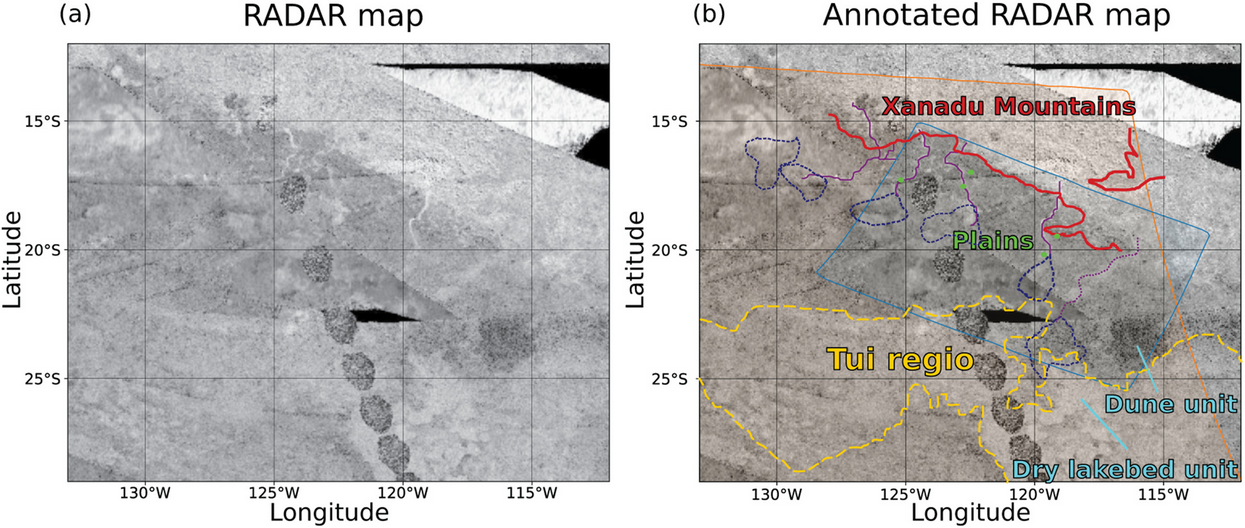

The VIMS cubes are the rectangular regions in the annotated version of this radar map. Note that the area between Xanadu and Tui Regio is basically covered in both. THe purple lines are the channeles focused on in the study. 

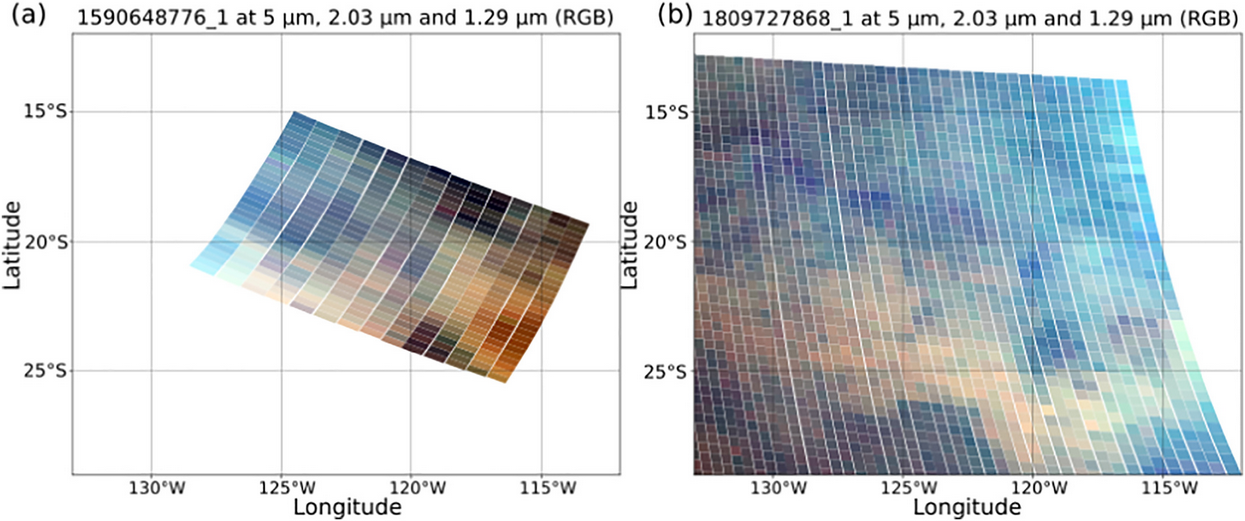

The VIMS cubes individually. 5um red, 2 green, 1.3 blue. Water ice sections have water ice enrichment, the peach area is evaporites, and the dark area is SAAAAAAAAAAND.

# THE RADIATIVE TRANSFER MODEL
## Aka the Part we Care About. 
### Or one of the parts anyway, sicne we have a RTM as well.

This model primarily uses Rannou's formulation. This model depends on free parameters that include the albedo.

### Part I: Atmospheric Properties and Composition.

Huygens provided the isotope ratios for methane, while CIRS observations determined the absorbing gas stuff. The Nixon model is used for isotopes, Vinatier for absorbing gasses (CO C2H2 HCN). 

### PART II: Gas Spectroscopic Absorption

HITRAN database provides most of the spectroscopic data, wich the exception of CH4 (methane) which is part of the TheoReTS database. VIMS channel changes modeled with Clark's recommendations. This is done for the various methane species and the absorgbing gasses above. 

### PART III: Aerosol Model

Consider both Tomasko and Doose, divide the aerosol into two layers. 55km and up is modeled as fractal aggregate "haze". THe lower layer is called "mist" which is an undefined mixture of stuff. Note that Doose has a special modification of the aerosol phase function, and there is more mention of speical observaitons in T88 getting their own separate dedicated article. HAze and mist phase functions are considered the same since we don't ahve enough information to differentiate. 

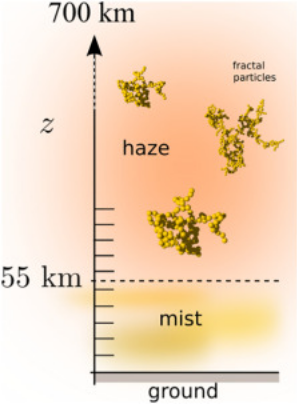

This model assumes 3000 monomer particles with radii of 50nm and fractal dimension of 2.3 (though it is later said this is a free parameter). These values match Tomasko, save the fractal dimension, which was 2. We also have a scaled single-scattering abledo from Doose:

$$ \omega_{mist} = (0.565+\omega_{haze})/1.5 $$

Where $\omega$ is just a single-scattering albedo.

Rannou provides the refractive indices. 

Doose appears to be providing most of the data here.

Equations with bad formatting coming up. We've corrected them here.

$$ \Delta \tau_{h}(z,\lambda) = F_h \Delta \tau_{h_D}(z) \frac{\sigma(\lambda)}{\sigma(\lambda_0)} $$
$$ \Delta \tau_{m}(z,\lambda) = F_m \Delta \tau_{m_D}(z) \frac{\sigma(\lambda)}{\sigma(\lambda_0)} $$

So the two equations have "h" for haze and "m" for mist. F is the free paraemters associated with them. $\sigma$ is the extinction cross-section of the fractal aggregates, $\Delta\tau$ values are the normalized opacity of Doose at 1um for an atmospheric layer at the altitude z times the total opacity of the atmospheric column at $\lambda_0$ = 1um.

Basically this is all just calculating the optical depth. 

This is as important set of equations, since the free parameters F are what we retrieve later. This means the model needs to either be given all other values, or find them. In english, the equations read:



The optical depth at any height and wavelength equals the optical depth at a specific wavelength times the corss-section of the fractal aggregates at the wavelength we desire divided by the cross-section at the reference wavelength (1um). The scale between these two values is F, which can be thought of as a "difference from the ideal." 

### PART IV: Other Components and Technical Aspects

Rayleigh scattering is considered! Derived from Hansen and Travis... in 1974 good gravy.

CIA is from Lafferty and McKellar, two different papers.

Atmosphere is modeled into 70 uniform layers over 700 km. Two possible solvers: SHDOMPP and SPSDISORT. SHDOMPP was faster and had spherical corrections in it. 

The model uses correlated-k approximations as well, from Goody, four terms in each channel. 

100 terms of Legandre polynomial expansion for phase functions! Resolution and comptime goes up with number of streams.

Levenberg-Marquardt algorithm for synthetic spectra fitting. (FORTRAN! THE HORROR!)

# ON THE ERROR OF VIMS
## It Ain't Perfect
### So we gotta account for it somehow.

VIMS is variable across a cube, so dealing with that needs to be done. The equation is once again awkard, so we write it down here:

$$ \Sigma = \frac{std(I/F)}{mean(I/F)} $$

I/F is just the values the pixels report. (incident over flux, it can be read as.) The averages/deviations (relative standard deviation) are done over a 3x3 pixel box. This is only valid in the bands, not the windows, as the windows have surface variability in the way. The result is the following.

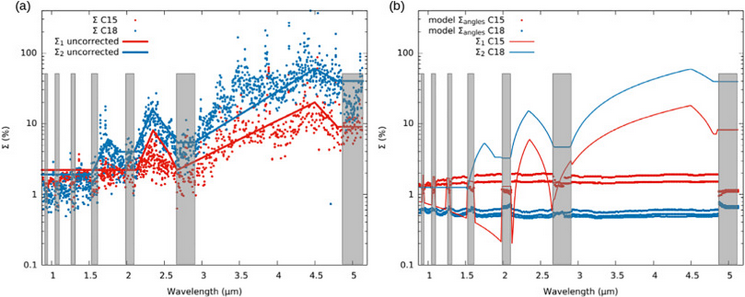

Left is uncorrected, right is corrected. The relative standard deviation is larger for more relative variability. Right is corrected by subtracting off variation due to angle variation (from a model). Note the uncertainties increase with wavelngth, perhaps the is is due to temperature induced IR radiation. (We've alwyas known 5um was the worst one anyway).  

Other equations:

$$ y_n = \frac{|(I/F)_n^{obs} - (I/F)_n^{mod}|}{\Sigma_n (I/F_n^{obs})}$$
$$ \chi^2 = \frac{1}{N} \sum^N_{n=1} y_n^2 $$

So we all know the chi-squared test, its a standard measure of vairous models "goodness." Here, N is the number of channels used to describe all the parameters, I/F is incidence/flux as always, and obs vs mod are observed vs modeled. It is unclear what n represents, clealry it's an index, but what for? What model exactly are we testing with this chi squared? If we follow the diagram, that implies that each "n" is a cube. 

y is apparently used to retreive the atmospheric parameters F in the earlier equations, but I don't see how. 

$$ \sigma_{A_\lambda} = \frac{dA_\lambda}{d(I/F)\lambda} \Sigma_\lambda $$

This is uncertainty in surface albedo, calculated from the derivative of the surface albedo $A_\lambda$ via I/F. This works for any wavelength.



# TEST AND PREPARATION OF THE MODEL FOR SURFACE ANALYSIS
## Gotta check it before we wreck it.
### Maybe this time we'll actually do something. 

### PART I: Tests of the Model Agaisnt the Number of Streams

Streams: the number of directions a radiative transfer solver calculates the intensity field. Various streams were tested.

Various streams are tested. 16 at start, up to 40. Naturally the larger the number the lower the error (on average, sometimes you just get lucky). The error is compared against a model with an absurd number of streams: 100. 

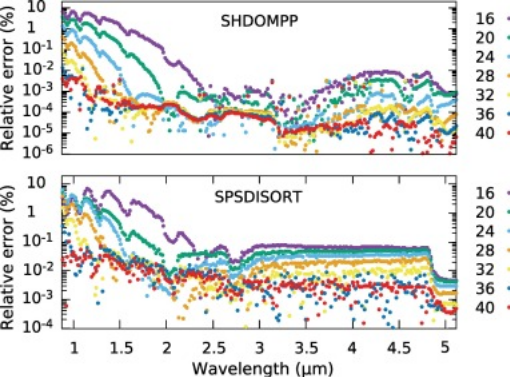

SHDOMPP is clearly better across the board. See how its error axis goes further down than SPSDISORT.

From this the deicsion was made: for SHDOMPP 32 streams up to 1.7um, then 24 streams for the rest. For SPSDISORT, it's 40 streams then 24 streams. This accomplishes less than 0.5% difference. Runtime for a single cube is less than a day.

### PART II: Tests of the Model in a Spherical Viewing

Up to 60 degrees is satisfactory for a plane parallel approximation. But we go ahead and test beyond that anyway. 32 streams for this test. 

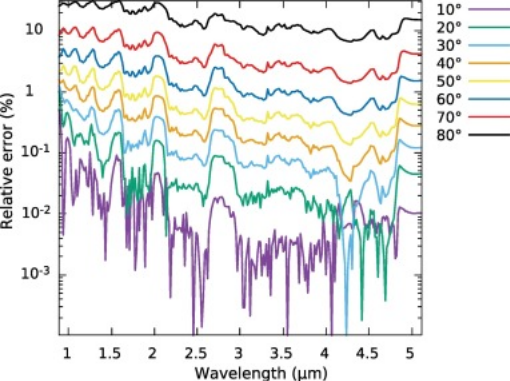

To the surprise of no one higher angles are less accurate. Though weird stuff happens between 4 and 5 microns. This actually isn't measuring error against a specific truth, but rather the two models against each other (treating SPS as "truth" for the purposes of grabbing the error). Thus the conclusion is simply that they diverge. 

The actual modeling limited to 50 and 55 degrees for SHDOMPP and SPSDISORT respectively.

### PART III: Haze and MIst Properties for Surface Analysis

The last step to actually make the model! HAZE and MIST properties. Done by choosing real pixels known to have dark albedo. For some reason the fit of model around 1um is terrible.

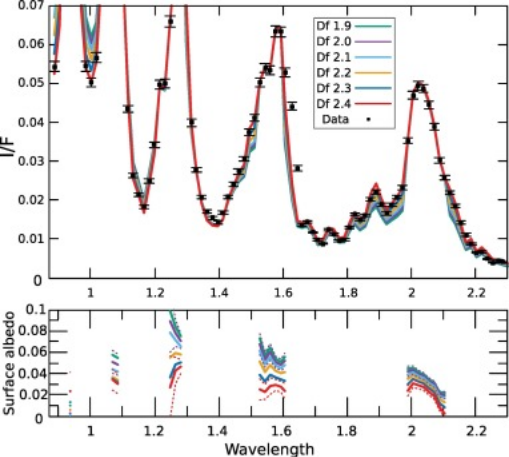

This image shows the fits of a test pixel using different fractal dimensions (Df) and the resulting surface albedos from those tests (which only show up in the windows, of course).

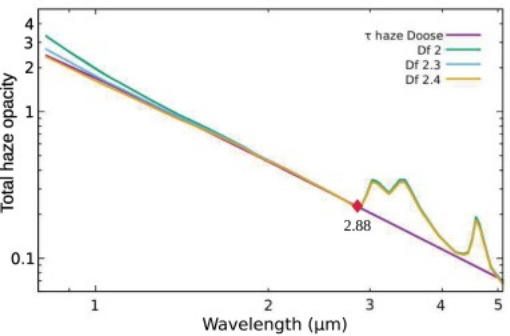

Here we're also adjusting the fractal dimension, but isntead of I/F or surface albedo, this is the Total Haze Opacity. This has the F values equal 1 and the angle of incidence and emergence at 10. Rannou aerosol model. Everything is set to match at 2.88 (anchored on the Doose model). 

Obviously something funky happens after 2.88.

chi-squared improves greatly for different fractal dimensions, with the dimension of 2.3-2.4 notably great. Espeically around the 1, 1.6, and 1.8-2.0um areas. Surface albedo variation tends to decrease with increasing fractal dimension, but not at 0.93. No explanation is forthcoming for this.

This is why the fractal dimension is set to 2.3 despite it being a free parameter in the model itself. 2.4 is better for 1um, but not other wavelengths. 

### PART IV: Tests of the Final Model on Huygens Landing Site

With the model, we retrieve the values of F for the Huygens Landing Site. It should be close to 1 as it's compared to the Huygens data as seen by Doose. I will note that I do not yet have a great understanding of how specifically it does this. Evidentially comparing the actual opacity to the model opacity is how you'd do it, still, it could be clearer. 

Anyway the parameters retrieve the F values as in the figure:

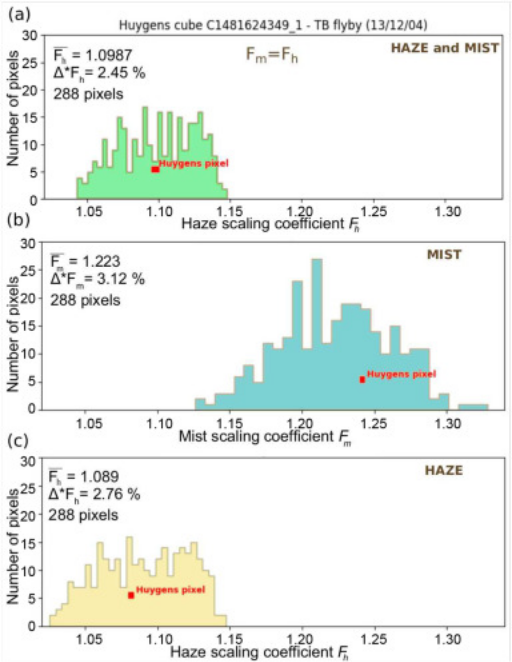

I will note that the MIST alone value doesn't seem very... good. Though the mist parameter is known to be more dependent on the lower atmosphere and thus mroe variable. The fact that the haze and haze+mist values don't change much from each other implies that the haze effect dominates. Comparing with Huygens is only possible below 1.6um. 

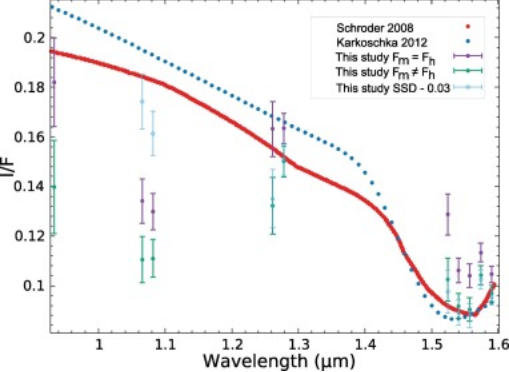

Of course the actual examining of the Huygens Landing Site is um... questionable at best, espeically at 1.1um. "Cannot be considered as a formal validation of our approach." 

So what did the model do? It calculated the optical depth. The other values required are model dependent (specifically dependent on the Fracatl Dimension, it seems). Model calculates the optical depth as seen through the pixel, compares it to the model, and find the difference in the free parameters F. (I think this is whats happening, this is just an interpretation in the end). 

# SURFACE ALBEDOS OF XANADU AND TUI REGIO
## Wait, weren't we calculating F?
### oh right F is just a free parameter in the model, riiiight.

### PART I: Method

So what we're actually doing is scaling both F factors and finding the minimum error as described in THE ERROR OF VIMS. So thaaaat's how this is actually done. Once we have the best Fs, we also have the optical depths, which we can use to retrieve the surface albedo in the methane windows. However we can't just calcualte it out, we have to run models at each surface albedo--and then we interpolate to find the probable actual value. 

So yeah this is a little bit of a roundabout way to do all this. I feel as though this should have been explained earlier but who am I to judge.

### PART II: Criteria for Water Ice Presence

We compare to Enceladus data to find signs of water. Even if the signs are outside the windows, they can still affect the windows somewhat. We do not expect to get pure water of course. The comparisons are done via ratios in various parts of the spectrum, declaring signs of water ice to be "more than 1" or "less than 1" for specific ratios. There's also the average of the 5um window albedo. The parameter defined to identify water is

$$ \delta = -1 - \sigma_{A_5} \bar{A_{5_n}} + \Sigma^4_{k=1} \pm 1 - \sigma_{r_k} r_{n_k} $$



So to be clear, this is a parameter with a maximum value of 1 and minimum of -4 for detecting water based on various ratios and things. It's a little hard to parse, but I'll give it my best. But first, a warning, this number should not be used by itself, the VIMS colormaps should be used to add additional confirmation. RADAR too. $\delta$ is a tool for terrain classification.

ANyway, $\sigma$ values are all relative uncertainties here, calculated from abledo relative uncertainties. Due to this I suspect there are some missing parentheses in the equation, but we'll figure that out later, if at all. The A is the average albedo over 5um. Each r is a ratio of two wavelengths, of which there are four (hence the sum). Note that we subtract or add on the plus or minus depending on whether the ratio needs to be less than or greater than 1. (Absolute madness, why isn't this indicated like normal??) 

If all relative uncertainties are 0, that is we know everything perfectly, this equation seems to break considerably, as the ratios themselves no longer matter and the result is just -1 -1 -1 -1 +1. Which makes absolutely no sense. Now if we add parentheses like this...

$$ \delta = -(1 - \sigma_{A_5}) \bar{A_{5_n}} + \Sigma^4_{k=1} \pm (1 - \sigma_{r_k}) r_{n_k} $$

This is far more sensible. With abolust ecertainty in the values, we still have to multiply by said values to get results. The question is if they are the right ones. To do that we must examine the actual values. ratios 1-3 need to be less than 1, 4 needs to be greater than, and the albedo at 5um is its own thing. All the ratios get normalized according to 

$$ r_{1_n} = \frac{r_1 - r_{1_{min}}}{r_{1_{max}} - r_{1_{min}}} $$

Thus with this normalization all parameters are effectively less than 1. This does make it hard to judge what exactly is going *on* but we can make it work. So with perfect knowledge, we end up with:

$$ \delta = -\bar{A_{5_n}} - r_{n_1} - r_{n_2} - r_{n_3} + r_{n_4} $$

WHich depending on the values of the normalized ratios, varies from -4 to 1. Ding ding ding. Let me remind everyone PARENTHESES MATTER.

### PART III: Haze and Mist Results

At this point we start talking physics results of the analysis, so I think I'll have less to say overall. 

No argumenet for correlation between angles and the F values. 

There are obviously giong to be biases in here. 

### PART IV: Water-Ice Distribution Results

Here's what $\delta$ looks like on our cubes. 

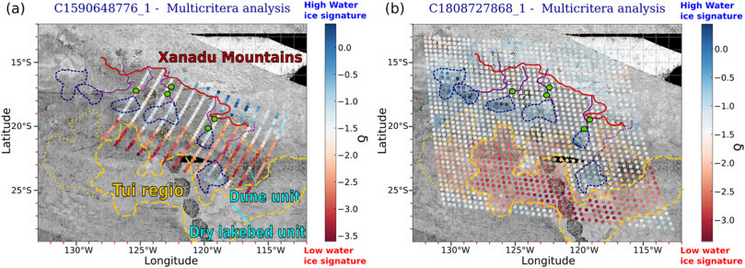

Cubes again for reference:

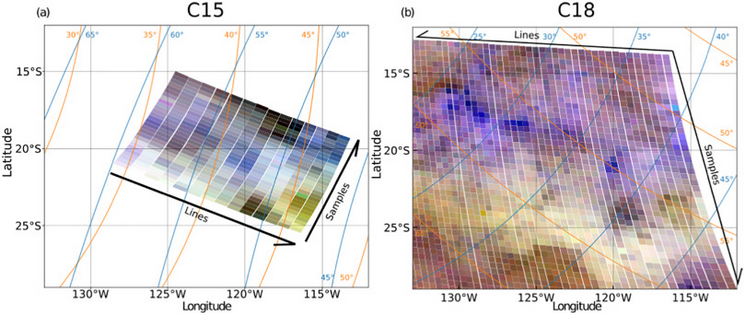

You know what, for all the craziness used to get here, ti is consistent with the outlined shapes from earlier, I'll give it that. There are apparently a few places that don't line up with VIMS coloration. Examining closely, yeah it does seem like the lowets "blue" area is actually "brown" in the VIMS, in both images. Interesting. So VIMS coloration is insufficient to declare there is or is not lots of water content. (big!)

# DISCUSSION ON THE WATER ICE SIGNATURE AND ON GEOLOGICAL STRUCTURES
## The part I usually read
### But the last interesting in the sense of this analysis as there's nothing to analyze, it's already done. 

Strength of the signature is known to change with grain size. 

Even with all this analysis an exact amount of water present is unclear; that it is present is clear.

The situation on the ground changes between the two dates.

The dunes should be dry, but appear to have *some* water-ice component?

Evidence not convincing that craters caused the enhance water-ice signatures at channel ends. 

Tui regio is very dry, consistent with being evaporitic. 

Final conclusion: the observation indicates that there are river beds ending in delta formations at the edge of a paleolake. 

# CONCLUSION
## Told you there wasn't much to say.
### THE END IS NIGH! WHEEEEE!




# AN ADDENDUM
## What is the process used?

The paper isn't exactly clear about laying out the program's exact process. So let's work backward.

Our calculated result, $\delta$, is a measure of the water content of a pixel. 

This depends on three kinds of values: average abledos, abledo ratios, and errors. 

The abledo ratios are just albedo measurements, so basically we can say $\delta$ depends on retreiving albedos, and then errors. These errors are calculated using average abledos over the entire window--5um is not the only window where an average is taken. 

The uncertainty in average albedo is dependant on the number of windows considered, and the uncertainty of surface albedo itself at any given wavelength.

The uncertainty in an albedo at a given wavelength is related to the derivative of the albedo in relation to I/F times the relative standard deviation in I/F of the 9-pixel set of whatever we're looking at.

Now I/F is obtained directly from the VIMS observations, that is no issue. What I can't find is how the surface albedo is *determined*. section 6.1 describes the F values as being necessary to do this, but I don't see the "how". The radiative transfer model is somehow responsible, yes.

AHA! The model depends on free parameters, and surface albedo is one of them. THE CHI-SQUARED TEST IS DETERMINING THE ALBEDO. 

So the free paraemters are the F values, and the optical depth. (And the fractal dimension). 

SO HERE'S HOW IT WORKS

ZERO: set your fractal dimension to 2.3 due to reasons outlined elsehwere, removin git as a free parameter. 

ONE: examine a section of the spectrum OUTSIDE the windows so albedo isn't a factor. From there, fit the spectra of the model to the spectra observed. This fit sets the F parameters via a chi-squared test.

TWO: now that the F parameters are set, we look inside the windows, treating albedo as the only free parameter. We recover it via a similar chi-squared test.

THREE: use the retrieved albedos and known I/Fs and calculate their ratios and means for specific situations.

FOUR: calculate $\delta$ at long last, showing you how strong the water signal is.

And that's how the program actually works.